In [2]:
### Basic Imports
import os
import pandas as pd
import numpy as np
from itertools import combinations

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 

### Importing text processing packages
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize
# from valuable_features import *

### Importing the relevant ML libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_curve,auc,recall_score,f1_score,precision_score,classification_report,confusion_matrix,auc
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample

# Creating features for comment (if necessary)

## Read in training and validation data first

In [2]:
path_parent = os.path.dirname(os.path.dirname(os.getcwd()))
training_data_path = f'{path_parent}/Data/Thoughtful Comments/thoughtful_comments_labelled.csv'
validation_data_path = f'{path_parent}/Data/Thoughtful Comments/validation_comments.csv'

## Create features
### Function for creating features in valuable_features.py

In [13]:
training_features_created = create_features(training_data_path)
training_features_created.to_csv(f'{path_parent}/Data/Thoughtful Comments/thoughtful_comments_final.csv')

validation_features_created = create_features(validation_data_path)
validation_features_created.to_csv(f'{path_parent}/Data/Thoughtful Comments/validation_comments_final.csv')

NameError: name 'create_features' is not defined

# Reading training and validation data after features creation for EDA and modelling

In [14]:
path_parent = os.path.dirname(os.path.dirname(os.getcwd()))
training_df = pd.read_csv(f'{path_parent}/Data/Thoughtful Comments/thoughtful_comments_final(1).csv')
training_df.drop(['Unnamed: 0'], axis=1, inplace=True)
validation_df = pd.read_csv(f'{path_parent}/Data/Thoughtful Comments/validation_comments_final(1).csv')
validation_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# EDA

In [15]:
training_df.describe()

,Label1,Label2,Label3,Thoughtful? (voting),Thoughtful?,Length,Length Category,Average Loglikelihood,Num Verbs,Num Discourse Relations,Num Pronouns,Relevance score,Relevance Score Category
count,3963.000000,3963.000000,3961.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,0.069897,0.080747,0.090381,0.069392,0.137774,32.098915,1.356548,-12.718031,5.949029,1.165026,0.958617,15.935466,1.287661
std,0.255005,0.272480,0.286763,0.254151,0.344707,47.502223,1.077183,2.389991,9.426563,2.094564,1.703340,35.004717,1.248731
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-23.822927,0.000000,0.000000,0.000000,-0.666377,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-13.848168,2.000000,0.000000,0.000000,3.777055,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,-12.124753,4.000000,1.000000,0.000000,7.287618,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,2.000000,-10.997740,7.000000,2.000000,1.000000,15.463359,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,983.000000,4.000000,-7.103919,191.000000,41.000000,33.000000,408.447008,4.000000


In [16]:
training_df[['Length Category']].value_counts()
training_df[['Relevance Score Category']].value_counts()

Relevance Score Category
0                           1363
1                           1106
2                            796
3                            387
4                            311
dtype: int64

In [17]:
training_df[['Thoughtful?']].value_counts()

Thoughtful?
0              3417
1               546
dtype: int64

## Plotting boxplots for all features to see if there is significant difference between valuable/not valuable comments

### Feature 1 (Length)

Text(0.5, 1.0, 'Boxplot of Length (with outliers)')

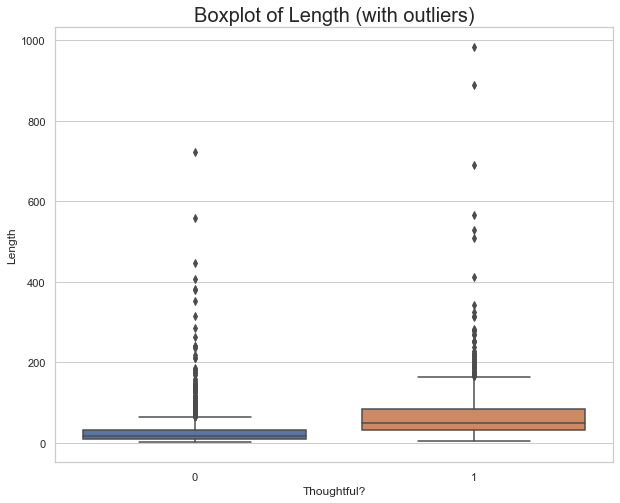

In [18]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Length', x='Thoughtful?', ax=ax).set_title('Boxplot of Length (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Length (without outliers)')

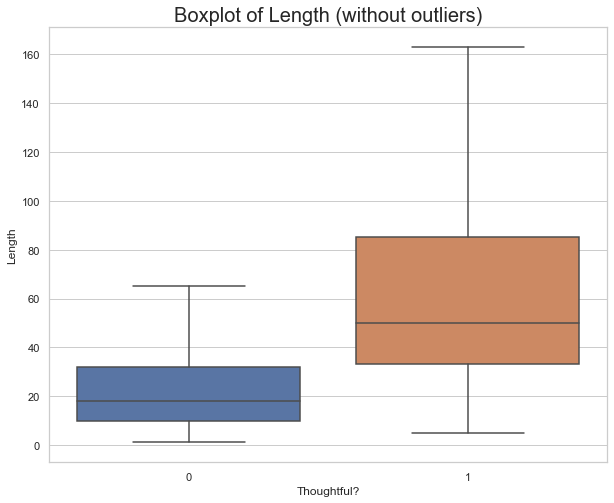

In [19]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Length', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Length (without outliers)', fontsize=20)

### Feature 2 (Comment Likelihood)

Text(0.5, 1.0, 'Boxplot of Comment Likelihood (with outliers)')

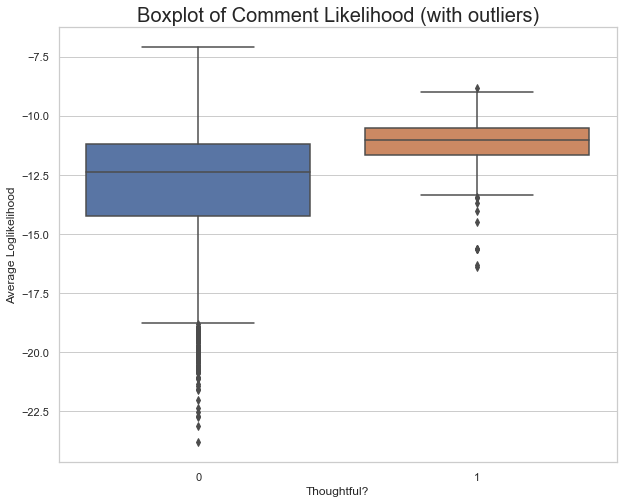

In [20]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Average Loglikelihood', x='Thoughtful?', ax=ax).set_title('Boxplot of Comment Likelihood (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Comment Likelihood (without outliers)')

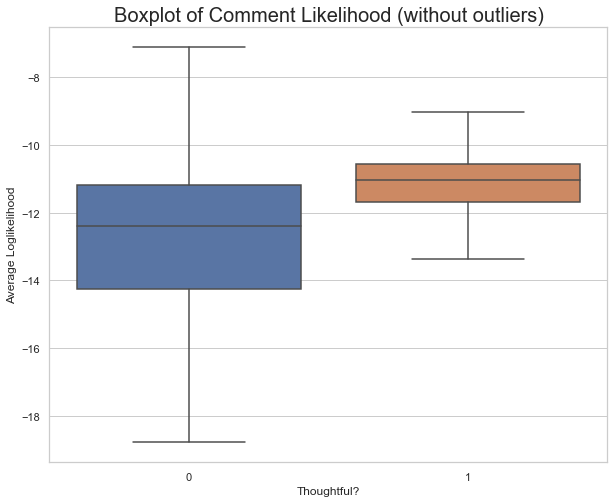

In [21]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Average Loglikelihood', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Comment Likelihood (without outliers)', fontsize=20)

### Feature 3 (Num Verbs)

Text(0.5, 1.0, 'Boxplot of Number of Verbs (with outliers)')

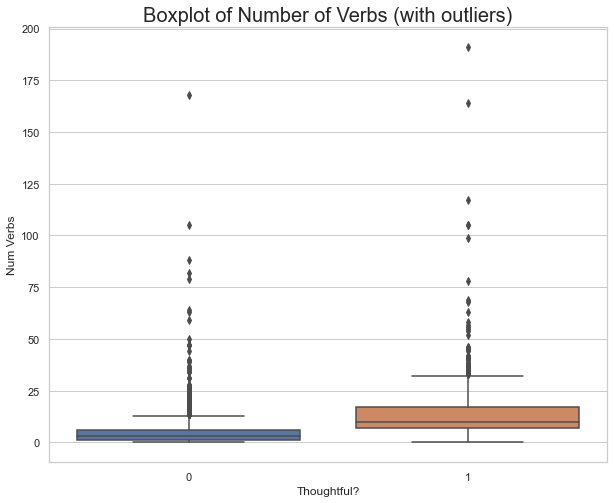

In [22]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Verbs', x='Thoughtful?', ax=ax).set_title('Boxplot of Number of Verbs (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Number of Verbs (without outliers)')

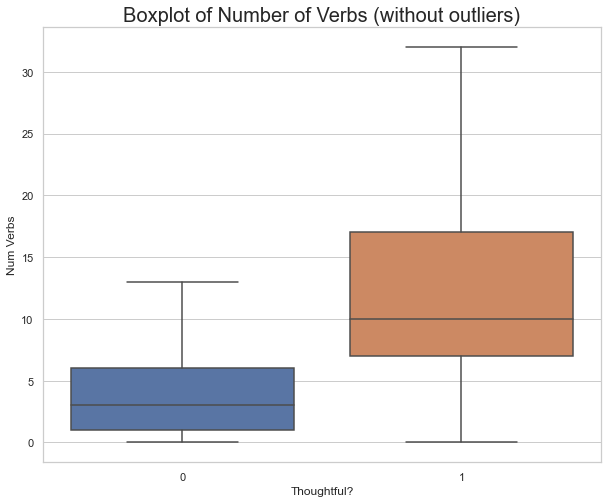

In [23]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Verbs', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Number of Verbs (without outliers)', fontsize=20)

### Feature 4 (Num Discourse Relations)

Text(0.5, 1.0, 'Boxplot of Number of Discourse Relations (with outliers)')

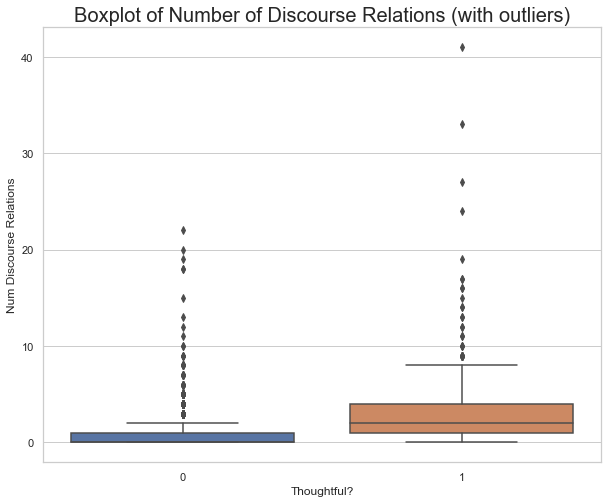

In [24]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Discourse Relations', x='Thoughtful?', ax=ax).set_title('Boxplot of Number of Discourse Relations (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Number of Discourse Relations (without outliers)')

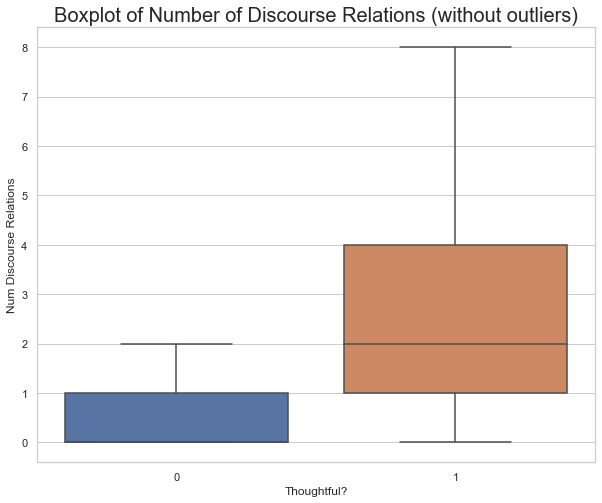

In [25]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Discourse Relations', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Number of Discourse Relations (without outliers)', fontsize=20)

### Feature 5 (Relevance Score)

Text(0.5, 1.0, 'Boxplot of Relevance Score (with outliers)')

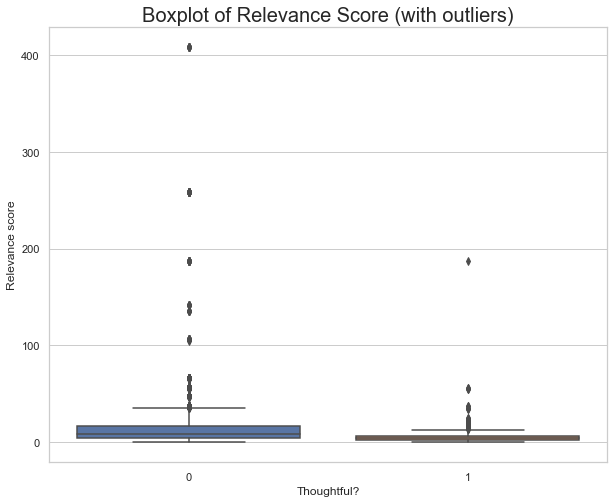

In [26]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Relevance score', x='Thoughtful?', ax=ax).set_title('Boxplot of Relevance Score (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Relevance Score (without outliers)')

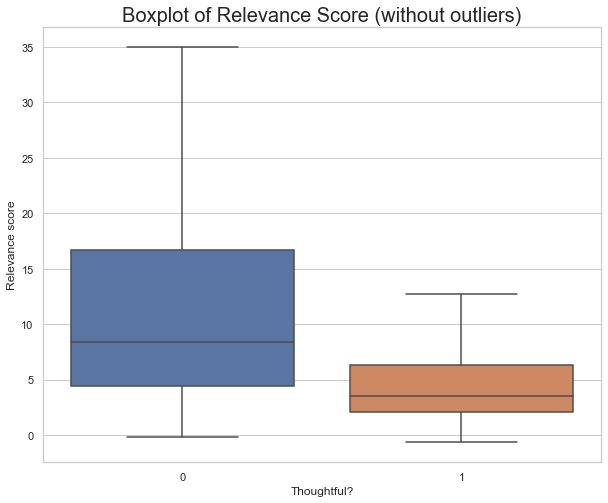

In [27]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Relevance score', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Relevance Score (without outliers)', fontsize=20)

### Feature 6 (Num Pronouns)

Text(0.5, 1.0, 'Boxplot of Num Pronouns (with outliers)')

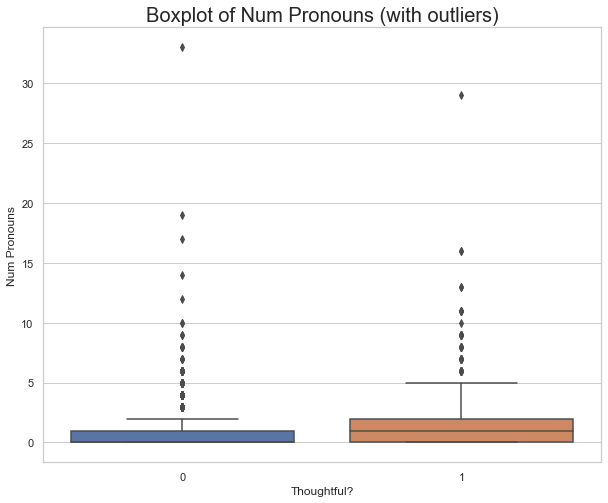

In [28]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Pronouns', x='Thoughtful?', ax=ax).set_title('Boxplot of Num Pronouns (with outliers)', fontsize=20)

Text(0.5, 1.0, 'Boxplot of Num Pronouns (without outliers)')

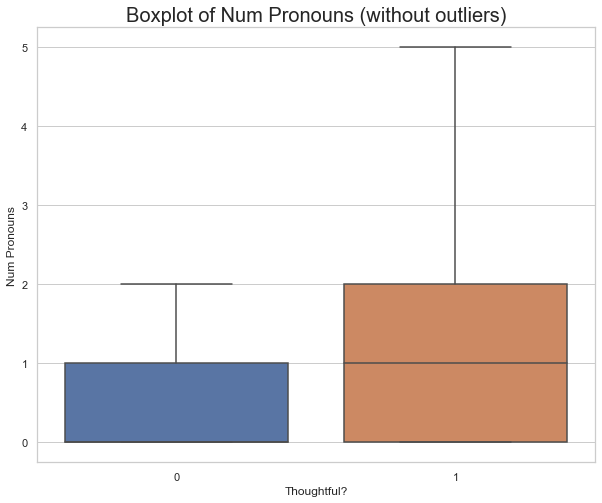

In [29]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=training_df, y='Num Pronouns', x='Thoughtful?', ax=ax, showfliers=False).set_title('Boxplot of Num Pronouns (without outliers)', fontsize=20)

## Looking at distributions of independent variables

In [30]:
features_list = ['Length', 'Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Relevance Score Category', 'Num Pronouns']
target = 'Thoughtful?'

# Function to plot distribution graphs
def eda_plots(df,features_list,plot_title,fig_size):

    df[features_list].hist(bins=40,edgecolor='b',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid= False,figsize=fig_size ,color='red')

    plt.tight_layout(rect=(0,0,1.2,1.2))

    # Overall title for all the plots
    plt.suptitle(plot_title,x=0.65,y=1.25,fontsize=14)

    plt.show()

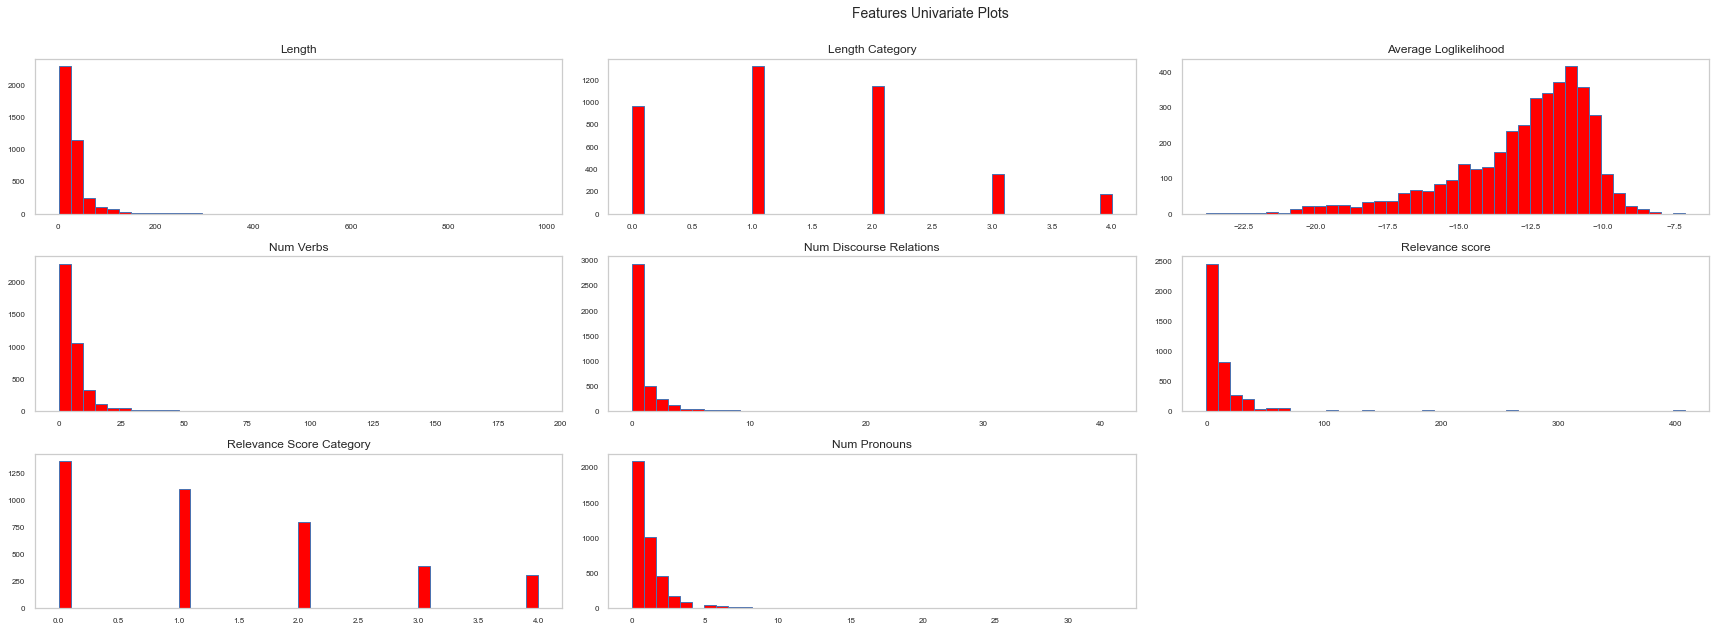

In [21]:
eda_plots(training_df,features_list,'Features Univariate Plots',(20,7))

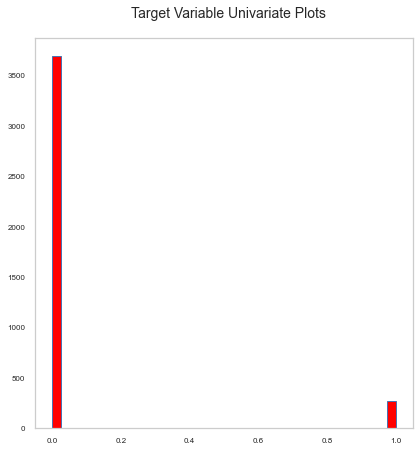

In [22]:
eda_plots(training_df,target,'Target Variable Univariate Plots',(5,5))

# Standardizing independent variables

In [31]:
scaler = StandardScaler()

training_X_scaled = training_df[features_list]
# training_X_scaled = scaler.fit_transform(training_df[features_list])
# training_X_scaled = pd.DataFrame(training_X_scaled, columns=features_list)

validation_X_scaled = validation_df[features_list]
# validation_X_scaled = scaler.fit_transform(validation_df[features_list])
# validation_X_scaled = pd.DataFrame(validation_X_scaled, columns=features_list)

# Feature importance (using RandomForestClassifier)

In [32]:
X = training_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y = training_df['Thoughtful?']
feat_labels = ['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [33]:
sel_rfc = SelectFromModel(RandomForestClassifier(n_estimators = 500, random_state=10))
sel_rfc.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=10))

In [34]:
selected_feat= X_train.columns[(sel_rfc.get_support())]
selected_feat

Index(['Length', 'Average Loglikelihood', 'Num Verbs', 'Relevance score'], dtype='object')

In [35]:
clf = RandomForestClassifier(n_estimators=500, random_state=10)
clf.fit(X_train, y_train)

for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Length', 0.22623982177073132)
('Average Loglikelihood', 0.24176213383855116)
('Num Verbs', 0.17102609852833775)
('Num Discourse Relations', 0.08830480033830332)
('Relevance score', 0.2090193210387009)
('Num Pronouns', 0.06364782448537562)


# Modelling

## Creating a dictionary for all the classification models

In [48]:
models_dict = {
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    # 'Decision Trees':DecisionTreeClassifier(),
    'SVM linear': svm.SVC(kernel='linear', probability=True),
    'SVM rbf': svm.SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators = 500, random_state=10),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False)
}

## Train test split on training data

In [38]:
def get_features_combi(features, n):
    comb = []
    for i in range(3, n+1):
        temp = list(combinations(features, i))
        comb += temp
    return comb
comb = get_features_combi(['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns'], 6)

best_model = {
    'features': [], 
    'model': None, 
    'accuracy': 0,
    'precision': 0,
    'recall': 0,
    'f1': 0 
}

for combi in comb:
    X = training_X_scaled[list(combi)]
    y = training_df['Thoughtful?']

    # Creating our independent and dependent variables df
    # X = training_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
    # y = training_df['Thoughtful?']

    # Perform train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15) 

    # Training with differnent models
    for model_name in models_dict:
        m = models_dict[model_name]
        
        m.fit(X_train, y_train)
        predictions = m.predict(X_test)

        acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels
        precision = precision_score(y_test,predictions) 
        recall = recall_score(y_test,predictions) 
        f1 = f1_score(y_test,predictions)

        if f1 > best_model['f1']:
            best_model['features'] = combi
            best_model['model'] = model_name
            best_model['acc'] = acc
            best_model['prec'] = precision
            best_model['recall'] = recall
            best_model['f1'] = f1

        # print(model_name)
        # print('-'*50)
        # print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
        # print('Precision Score for {} is {:.5f}'.format(model_name,precision))
        # print('Recall Score for {} is {:.5f}'.format(model_name,recall))
        # print('F1 Score for {} is {:.5f}'.format(model_name,f1))
        # print()
best_model

[22:29:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

{'features': ('Average Loglikelihood', 'Num Verbs', 'Relevance score'),
 'model': 'Naive Bayes',
 'accuracy': 0,
 'precision': 0,
 'recall': 0.6470588235294118,
 'f1': 0.5898123324396783,
 'acc': 0.8713204373423045,
 'prec': 0.541871921182266}

In [47]:
# Creating our independent and dependent variables df
X = training_X_scaled[['Average Loglikelihood', 'Num Verbs', 'Relevance score']]
y = training_df['Thoughtful?']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15) 

# Training with differnent models
for model_name in models_dict:
    m = models_dict[model_name]
    
    m.fit(X_train, y_train)
    predictions = m.predict(X_test)

    acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels
    precision = precision_score(y_test,predictions) 
    recall = recall_score(y_test,predictions) 
    f1 = f1_score(y_test,predictions)


    print(model_name)
    print('-'*50)
    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
    print('Precision Score for {} is {:.5f}'.format(model_name,precision))
    print('Recall Score for {} is {:.5f}'.format(model_name,recall))
    print('F1 Score for {} is {:.5f}'.format(model_name,f1))
    print()

Logistic Regression
--------------------------------------------------
Accuracy Score for Logistic Regression is 0.87216
Precision Score for Logistic Regression is 0.69565
Recall Score for Logistic Regression is 0.18824
F1 Score for Logistic Regression is 0.29630

Naive Bayes
--------------------------------------------------
Accuracy Score for Naive Bayes is 0.87132
Precision Score for Naive Bayes is 0.54187
Recall Score for Naive Bayes is 0.64706
F1 Score for Naive Bayes is 0.58981

SVM linear
--------------------------------------------------
Accuracy Score for SVM linear is 0.85786
Precision Score for SVM linear is 0.60000
Recall Score for SVM linear is 0.01765
F1 Score for SVM linear is 0.03429

SVM rbf
--------------------------------------------------
Accuracy Score for SVM rbf is 0.86543
Precision Score for SVM rbf is 0.72727
Recall Score for SVM rbf is 0.09412
F1 Score for SVM rbf is 0.16667

Random Forest
--------------------------------------------------
Accuracy Score for R

## Stratified K-fold Cross Validation

In [39]:
skf = StratifiedKFold(n_splits=10)
target = training_df['Thoughtful?']

In [73]:
X = ['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']
y = ['Thoughtful?']

model = GaussianNB() # can change the model here

fold_no = 1
for train_index, test_index in skf.split(training_df, target):
    train = training_df.loc[train_index,:]
    test = training_df.loc[test_index,:]
    print('Fold', str(fold_no), 'Class Ratio:', sum(test['Thoughtful?'])/len(test['Thoughtful?']))
    
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    model.fit(X_train, y_train.values.ravel())
    predictions = model.predict(X_test)
    print('Fold', str(fold_no), 'F1 score:', f1_score(y_test,predictions))
    print()

    fold_no += 1

Fold 1 Class Ratio: 0.07052896725440806
Fold 1 F1 score: 0.39215686274509803

Fold 2 Class Ratio: 0.07052896725440806
Fold 2 F1 score: 0.3829787234042553

Fold 3 Class Ratio: 0.07052896725440806
Fold 3 F1 score: 0.360655737704918

Fold 4 Class Ratio: 0.06818181818181818
Fold 4 F1 score: 0.37974683544303794

Fold 5 Class Ratio: 0.06818181818181818
Fold 5 F1 score: 0.6428571428571429

Fold 6 Class Ratio: 0.06818181818181818
Fold 6 F1 score: 0.7450980392156864

Fold 7 Class Ratio: 0.06818181818181818
Fold 7 F1 score: 0.5230769230769231

Fold 8 Class Ratio: 0.06818181818181818
Fold 8 F1 score: 0.23684210526315788

Fold 9 Class Ratio: 0.0707070707070707
Fold 9 F1 score: 0.34782608695652173

Fold 10 Class Ratio: 0.0707070707070707
Fold 10 F1 score: 0.3846153846153846



In [20]:
# X = training_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
X = training_X_scaled[['Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score']]
y = training_df[['Thoughtful?']]

for model_name in models_dict:
    m = models_dict[model_name]
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    scores = cross_validate(m, X.values, y.values.ravel(), scoring=scoring, cv=5)

    # if scores['test_f1'].mean() > best_model['f1']:
    #     best_model['features'] = combi
    #     best_model['model'] = model_name
    #     best_model['acc'] = scores['test_accuracy'].mean()
    #     best_model['prec'] = scores['test_precision'].mean()
    #     best_model['recall'] = scores['test_recall'].mean()
    #     best_model['f1'] = scores['test_f1'].mean()
    print(model_name)
    print('-'*50)
    print(f"Mean accuracy is {scores['test_accuracy'].mean()}")
    print(f"Mean precision is {scores['test_precision'].mean()}")
    print(f"Mean recall is {scores['test_recall'].mean()}")
    print(f"Mean f1 is {scores['test_f1'].mean()}")
    print()
    print()

Logistic Regression
--------------------------------------------------
Mean accuracy is 0.9328779599271403
Mean precision is 0.5972325060560355
Mean recall is 0.2436363636363636
Mean f1 is 0.3341773994755635


Naive Bayes
--------------------------------------------------
Mean accuracy is 0.9033458799852243
Mean precision is 0.42139357756730467
Mean recall is 0.6799999999999999
Mean f1 is 0.5134990067245673


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control

## Test against validation data with the best model after stratified k-fold cross validation

In [42]:
# Creating our independent and dependent variables df
# X_train = training_X_scaled[['Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
X_train = training_X_scaled[['Average Loglikelihood', 'Num Verbs', 'Relevance score']]
y_train = training_df[['Thoughtful?']]
X_test = validation_X_scaled[['Average Loglikelihood', 'Num Verbs', 'Relevance score']]
y_test = validation_df[['Thoughtful?']]

# Training with differnent models
for model_name in models_dict:
    m = models_dict[model_name]

    # X_train = training_data[X]
    # y_train = training_data[y]
    # X_test = validation_data[X]
    # y_test = validation_data[y]
    
    m.fit(X_train, y_train.values.ravel())
    predictions = m.predict(X_test)

    acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
    precision = precision_score(y_test,predictions) 
    recall = recall_score(y_test,predictions) 
    f1 = f1_score(y_test,predictions)

    print(model_name)
    print('-'*50)
    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
    print('Precision Score for {} is {:.5f}'.format(model_name,precision))
    print('Recall Score for {} is {:.5f}'.format(model_name,recall))
    print('F1 Score for {} is {:.5f}'.format(model_name,f1))
    print()

Logistic Regression
--------------------------------------------------
Accuracy Score for Logistic Regression is 0.93168
Precision Score for Logistic Regression is 0.43243
Recall Score for Logistic Regression is 0.34783
F1 Score for Logistic Regression is 0.38554

Naive Bayes
--------------------------------------------------
Accuracy Score for Naive Bayes is 0.90489
Precision Score for Naive Bayes is 0.35119
Recall Score for Naive Bayes is 0.64130
F1 Score for Naive Bayes is 0.45385



KeyboardInterrupt: 

### ROC score

In [22]:
model = GaussianNB() #change this based on the best model performance
model.fit(X_train, y_train.values.ravel()) 
prob = model.predict_proba(X_test)
prob = [p[1] for p in prob]
print(roc_auc_score(y_test, prob))

0.8889845762343668


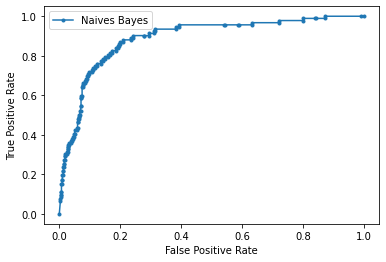

In [23]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naives Bayes') #change the label to the model with the best performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Perform upsampling method and model again

In [49]:
training_thoughtful = training_df[training_df['Thoughtful?'] == 1]
training_unthoughtful = training_df[training_df['Thoughtful?'] == 0]

# scaler = StandardScaler()
# features_list = ['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']

# training_thoughtful_X_scaled = scaler.fit_transform(training_thoughtful[features_list])
# training_thoughtful_X_scaled = pd.DataFrame(training_thoughtful_X_scaled, columns=features_list)
# training_unthoughtful_X_scaled = scaler.fit_transform(training_unthoughtful[features_list])
# training_unthoughtful_X_scaled = pd.DataFrame(training_unthoughtful_X_scaled, columns=features_list)

# training_thoughtful_X_scaled['Thoughtful?'] = training_thoughtful['Thoughtful?']
# training_unthoughtful_X_scaled['Thoughtful?'] = training_unthoughtful['Thoughtful?']

print(len(training_thoughtful))
print(len(training_unthoughtful))

546
3417


In [51]:
training_thoughtful_upsampled = resample(training_thoughtful, replace=True, n_samples=2000, random_state=170)
training_upsampled = pd.concat([training_unthoughtful, training_thoughtful_upsampled])

In [55]:
training_unthoughtful_downsampled = resample(training_unthoughtful, replace=False, n_samples=546, random_state=170)
training_downsampled = pd.concat([training_thoughtful, training_unthoughtful_downsampled])

In [42]:
training_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5188 entries, 0 to 3566
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comment                   5188 non-null   object 
 1   Topic                     5188 non-null   object 
 2   Label1                    5188 non-null   int64  
 3   Label2                    5188 non-null   int64  
 4   Label3                    5186 non-null   float64
 5   Thoughtful?               5188 non-null   int64  
 6   Length                    5188 non-null   int64  
 7   Length Category           5188 non-null   int64  
 8   Average Loglikelihood     5188 non-null   float64
 9   Num Verbs                 5188 non-null   int64  
 10  Num Discourse Relations   5188 non-null   int64  
 11  Num Pronouns              5188 non-null   int64  
 12  Relevance score           5188 non-null   float64
 13  Relevance Score Category  5188 non-null   int64  
dtypes: float

### Testing on validation data after upsampling

In [58]:
# Creating our independent and dependent variables df
# X_train = training_upsampled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
X_train = training_upsampled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_train = training_upsampled[['Thoughtful?']]
# X_test = validation_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
X_test = validation_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_test = validation_df[['Thoughtful?']]

# Training with differnent models
for model_name in models_dict:
    m = models_dict[model_name]

    # X_train = training_data[X]
    # y_train = training_data[y]
    # X_test = validation_data[X]
    # y_test = validation_data[y]
    
    m.fit(X_train, y_train.values.ravel())
    predictions = m.predict(X_test)

    acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
    precision = precision_score(y_test,predictions) 
    recall = recall_score(y_test,predictions) 
    f1 = f1_score(y_test,predictions)

    print(model_name)
    print('-'*50)
    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
    print('Precision Score for {} is {:.5f}'.format(model_name,precision))
    print('Recall Score for {} is {:.5f}'.format(model_name,recall))
    print('F1 Score for {} is {:.5f}'.format(model_name,f1))
    print()

Logistic Regression
--------------------------------------------------
Accuracy Score for Logistic Regression is 0.83925
Precision Score for Logistic Regression is 0.24306
Recall Score for Logistic Regression is 0.76087
F1 Score for Logistic Regression is 0.36842

Naive Bayes
--------------------------------------------------
Accuracy Score for Naive Bayes is 0.89685
Precision Score for Naive Bayes is 0.32184
Recall Score for Naive Bayes is 0.60870
F1 Score for Naive Bayes is 0.42105

SVM linear
--------------------------------------------------
Accuracy Score for SVM linear is 0.84394
Precision Score for SVM linear is 0.25088
Recall Score for SVM linear is 0.77174
F1 Score for SVM linear is 0.37867

SVM rbf
--------------------------------------------------
Accuracy Score for SVM rbf is 0.86738
Precision Score for SVM rbf is 0.29134
Recall Score for SVM rbf is 0.80435
F1 Score for SVM rbf is 0.42775

Random Forest
--------------------------------------------------
Accuracy Score for R

In [59]:
X_train = training_upsampled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_train = training_upsampled[['Thoughtful?']]
X_test = validation_X_scaled[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns']]
y_test = validation_df[['Thoughtful?']]

m = GaussianNB()

m.fit(X_train, y_train.values.ravel())
predictions = m.predict(X_test)

acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
precision = precision_score(y_test,predictions) 
recall = recall_score(y_test,predictions) 
f1 = f1_score(y_test,predictions)

print(model_name)
print('-'*50)
print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
print('Precision Score for {} is {:.5f}'.format(model_name,precision))
print('Recall Score for {} is {:.5f}'.format(model_name,recall))
print('F1 Score for {} is {:.5f}'.format(model_name,f1))
print()

XGBoost
--------------------------------------------------
Accuracy Score for XGBoost is 0.89685
Precision Score for XGBoost is 0.32184
Recall Score for XGBoost is 0.60870
F1 Score for XGBoost is 0.42105



In [60]:
validation_df['Predictions'] = predictions
validation_df.to_csv('/Users/chenjianyu/Desktop/predictions.csv')

## Test with all possible features combination to find the best model (on validation data)

In [62]:
def get_features_combi(features, n):
    combi = []
    for i in range(3, n+1):
        temp = list(combinations(features, i))
        combi += temp
    return combi

# comb = get_features_combi(['Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance Score Category'], 5)
combi = get_features_combi(['Length Category', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score', 'Num Pronouns'], 6)

In [11]:
scores = {
    'upsample': [],
    'features': [], 
    'model': [],
    'acc': [], 
    'prec': [],
    'rec': [],
    'f1': []
}
count = 0

for i in range(500, 3500, 100):
    training_thoughtful_upsampled = resample(training_thoughtful, replace=True, n_samples=i, random_state=170)
    training_upsampled = pd.concat([training_unthoughtful, training_thoughtful_upsampled])

    for features in combi:
        # Creating our independent and dependent variables df
        X = list(features)
        y = ['Thoughtful?']

        # Training with differnent models
        for model_name in models_dict:
            m = models_dict[model_name]

            X_train = training_upsampled[X]
            y_train = training_upsampled[y]
            X_test = validation_X_scaled[X]
            y_test = validation_df[y]
            
            m.fit(X_train, y_train.values.ravel())
            predictions = m.predict(X_test)

            acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
            precision = precision_score(y_test,predictions) 
            recall = recall_score(y_test,predictions) 
            f1 = f1_score(y_test,predictions)
                                                                                                                                                                                                                                                                                       
            print(count)
            count+=1

            # if f1 > scores['f1']:
            scores['upsample'].append(i)
            scores['features'].append(features)
            scores['model'].append(model_name)
            scores['acc'].append(acc)
            scores['prec'].append(precision)
            scores['rec'].append(recall)
            scores['f1'].append(f1)

 restore the old behavior.
7175
7176
7177
7178
7179
7180
[21:25:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7181
7182
7183
7184
7185
7186
[21:25:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7187
7188
7189
7190
7191
7192
[21:25:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7193
7194
7195
7196
7197
7198
[21:26:

0,
  0.34567901234567905,
  0.32679738562091504,
  0.3356643356643357,
  0.35353535353535354,
  0.0,
  0.23529411764705885,
  0.28571428571428564,
  0.3018867924528302,
  0.3120567375886525,
  0.3131991051454138,
  0.0,
  0.0,
  0.29530201342281875,
  0.2972972972972973,
  0.3611111111111111,
  0.38532110091743116,
  0.32592592592592595,
  0.3636363636363636,
  0.335195530726257,
  0.34523809523809523,
  0.36619718309859156,
  0.3655913978494624,
  0.32061068702290074,
  0.34146341463414637,
  0.3875,
  0.33333333333333337,
  0.3776223776223776,
  0.3710407239819004,
  0.3458646616541354,
  0.36619718309859156,
  0.33142857142857146,
  0.3048780487804878,
  0.33093525179856115,
  0.3688524590163934,
  0.0,
  0.021052631578947368,
  0.2681564245810056,
  0.26923076923076916,
  0.3468208092485549,
  0.4,
  0.3439490445859873,
  0.33333333333333337,
  0.3255813953488372,
  0.37125748502994016,
  0.3815028901734104,
  0.3942028985507246,
  0.3461538461538462,
  0.3611111111111111,
  0.3292

In [63]:
scores = {
    'features': [], 
    'model': [],
    'acc': [], 
    'prec': [],
    'rec': [],
    'f1': []
}
count = 0


training_thoughtful_upsampled = resample(training_thoughtful, replace=True, n_samples=2000, random_state=170)
training_upsampled = pd.concat([training_unthoughtful, training_thoughtful_upsampled])

for features in combi:
    # Creating our independent and dependent variables df
    X = list(features)
    y = ['Thoughtful?']

    # Training with differnent models
    for model_name in models_dict:
        m = models_dict[model_name]

        X_train = training_upsampled[X]
        y_train = training_upsampled[y]
        X_test = validation_X_scaled[X]
        y_test = validation_df[y]
        
        m.fit(X_train, y_train.values.ravel())
        predictions = m.predict(X_test)

        acc = accuracy_score(y_test,predictions)  # always true label first, then your predicted labels!
        precision = precision_score(y_test,predictions) 
        recall = recall_score(y_test,predictions) 
        f1 = f1_score(y_test,predictions)                                                                                                                                                                                                                                                             
        print(count)
        count+=1

        scores['features'].append(features)
        scores['model'].append(model_name)
        scores['acc'].append(acc)
        scores['prec'].append(precision)
        scores['rec'].append(recall)
        scores['f1'].append(f1)

0
1
2
3
4
[23:32:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5
6
7
8
9
10
[23:32:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
11
12
13
14
15
16
[23:32:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
17
18
19
20
21
22
[23:32:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1

In [81]:
training_thoughtful_upsampled = resample(training_thoughtful, replace=True, n_samples=2000, random_state=170)
training_upsampled = pd.concat([training_unthoughtful, training_thoughtful_upsampled])

X = ['Length Category','Num Pronouns', 'Average Loglikelihood', 'Num Discourse Relations', 'Num Verbs']
y = ['Thoughtful?']

m = GaussianNB()

X_train = training_upsampled[X]
y_train = training_upsampled[y]
X_test = validation_X_scaled[X]
y_test = validation_df[y]

m.fit(X_train, y_train.values.ravel())
predictions = m.predict(X_test)

In [71]:
scores = pd.DataFrame(scores)

scores.to_csv('/Users/chenjianyu/Desktop/scores4.csv')

### ROC score after upsampling

In [82]:
model1 = GaussianNB() #change this based on the best model performance
model1.fit(X_train, y_train.values.ravel()) 
prob_upsampled = model1.predict_proba(X_test)
prob_upsampled = [p[1] for p in prob_upsampled]
print(roc_auc_score(y_test, prob_upsampled))

0.8898651584272104


In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_upsampled)
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM (RBF kernal)') #change the label name based on the best performing model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()